In [38]:
!pip install xlsxwriter
!pip install textblob
!pip install openpyxl

In [30]:
from typing import ByteString
from cv2 import resize
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
from skimage.feature import hog
import pandas as pd
import cv2
from sklearn.utils import shuffle
import nltk
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import os
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import sklearn.feature_extraction.text as text
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
from sklearn.multiclass import OneVsRestClassifier,OneVsOneClassifier
# training a linear SVM classifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier,OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets
from matplotlib import pyplot as plt



In [2]:
def turn_to_xlsx():
    dir=os.listdir("20news-bydate-train")
    data=pd.DataFrame(({'contant': [],
                        'Name': [],
                        'type': [],}))
    for j in dir:
        dir1=os.listdir("20news-bydate-train/"+j)
        for i in dir1:
            cont=open("20news-bydate-train/"+j+"/"+i)
            df=pd.DataFrame(({'contant': [cont.read()],
                        'Name': [i],
                        'type': [j],}))
            data=pd.concat([df, data])
        
        
    print(data)
    data.to_excel(r'C:\Users\mando\Downloads\20news-bydate.tar\train.xlsx', sheet_name='train', index = False,engine='xlsxwriter')
    dir=os.listdir("20news-bydate-test")
    datatest=pd.DataFrame(({'contant': [],
                        'Name': [],
                        'type': [],}))
    for j in dir:
        dir1=os.listdir("20news-bydate-test/"+j)
        for i in dir1:
            cont=open("20news-bydate-test/"+j+"/"+i)
            df=pd.DataFrame(({'contant': [cont.read()],
                        'Name': [i],
                        'type': [j],}))
            datatest=pd.concat([df, data])
        
        
    print(datatest)
    datatest.to_excel(r'C:\Users\mando\Downloads\20news-bydate.tar\test.xlsx', sheet_name='test', index = False,engine='xlsxwriter')

In [3]:

data =pd.read_excel("train.xlsx")


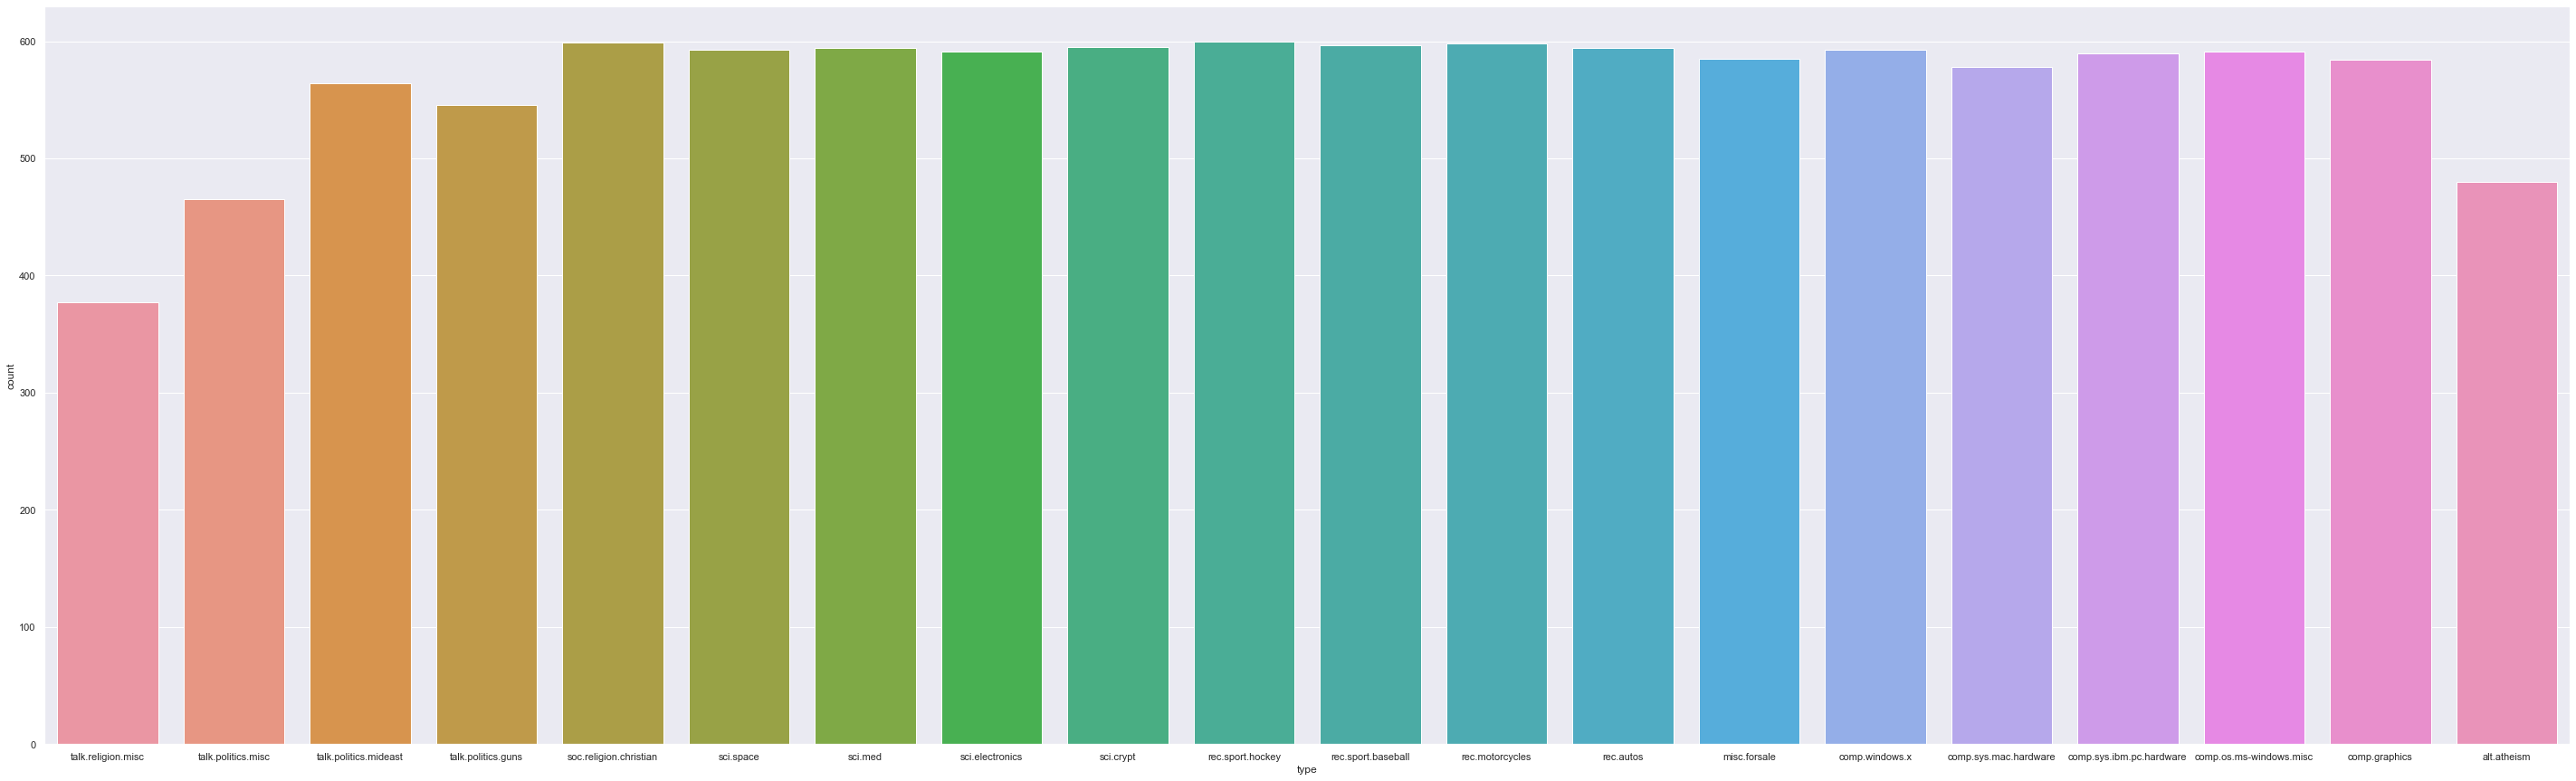

In [4]:
# Dataset Visualization

sns.set_theme(style="darkgrid")
plt.figure(figsize=(50,15))
ax = sns.countplot(x="type", data=data, )


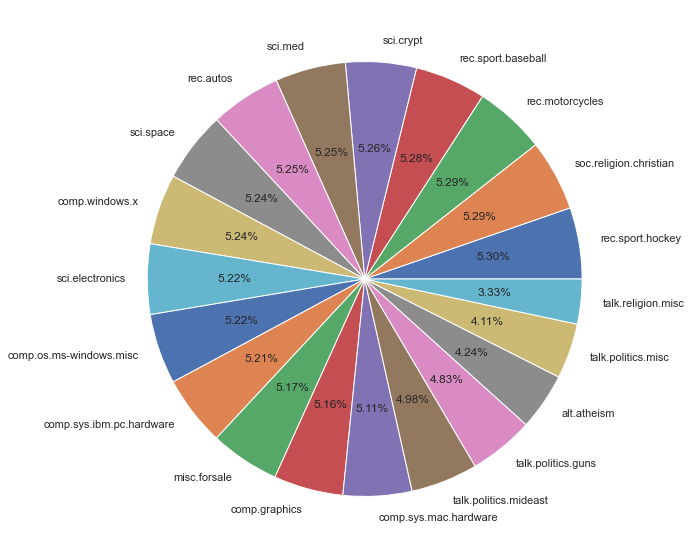

In [5]:
category_counts = data['type'].value_counts()
plt.figure(figsize=(10,10))
plt.pie(category_counts, labels=list(category_counts.index), autopct='%1.2f%%')
plt.show()

In [6]:
data['contant'] = data['contant'].apply(lambda x: " ".join(x.lower() for x in x.split()))
stop = stopwords.words('english')
data['contant'] = data['contant'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

data['contant'] =data['contant'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [121]:
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
features = tfidf_vect.fit_transform(data['contant']).todense()

In [8]:
test =pd.read_excel("test.xlsx")
test['contant'] = test['contant'].apply(lambda x: " ".join(x.lower() for x in x.split()))
stop = stopwords.words('english')
test['contant'] = test['contant'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

test['contant'] =test['contant'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))



In [122]:

featurestest = tfidf_vect.transform(test['contant']).todense()

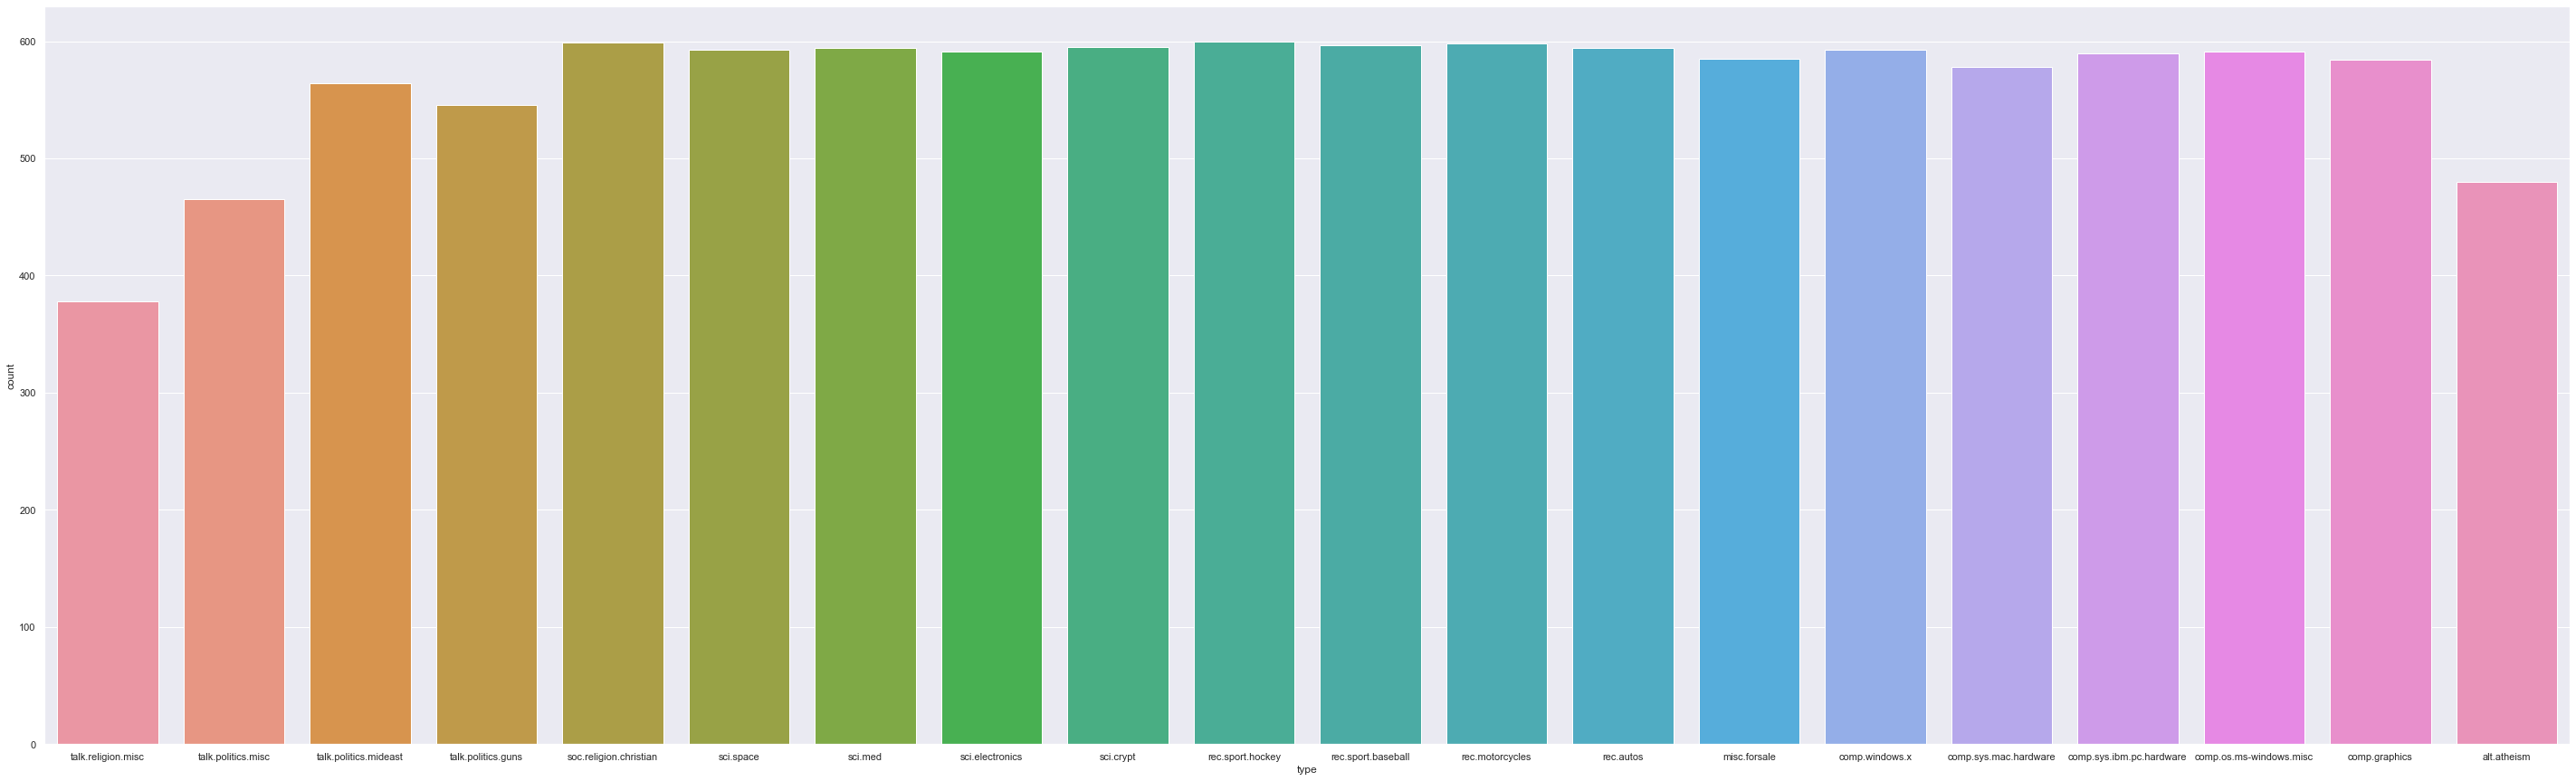

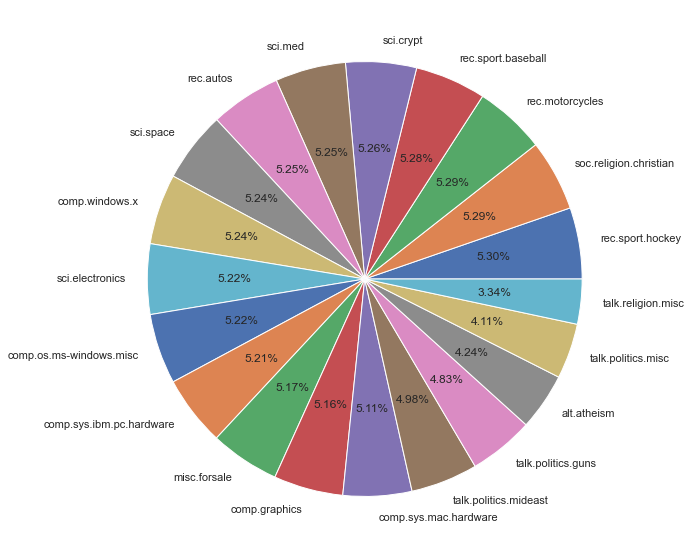

In [37]:
# Dataset Visualization

sns.set_theme(style="darkgrid")
plt.figure(figsize=(50,15))
ax = sns.countplot(x="type", data=test, )
category_counts = test['type'].value_counts()
plt.figure(figsize=(10,10))
plt.pie(category_counts, labels=list(category_counts.index), autopct='%1.2f%%')
plt.show()

In [29]:

# 20 label -> names transformed to numbers
#label_to_num = {}
# concatentate features label numbers
#log=linear_model.LogisticRegression()
clf = LogisticRegression(random_state=10,)
logistic_ovo =  OneVsOneClassifier(clf).fit(features, data.type)


#clf.fit(features, data.type)
accuracy = logistic_ovo.score(features, data.type)
print('logistic OneVsOne training accuracy: ' + str(accuracy))
accuracy = logistic_ovo.score(featurestest, test.type)
print('logistic OneVsOne test accuracy: ' + str(accuracy))

logistic OneVsOne training accuracy: 0.9423722821283366
logistic OneVsOne test accuracy: 0.9422889969067609


In [12]:
svm_kernel_ovr = OneVsOneClassifier(SVC(kernel='poly',degree=2, C=1)).fit(features, data.type)
accuracy = svm_kernel_ovr.score(features, data.type)
print('poly Kernel OneVsOne  training SVM accuracy: ' + str(accuracy))
accuracy = svm_kernel_ovr.score(featurestest, test.type)
print('poly Kernel OneVsOne test SVM accuracy: ' + str(accuracy))
#done 100%

poly Kernel OneVsOne  training SVM accuracy: 0.9958458546933003
poly Kernel OneVsOne test SVM accuracy: 0.9957578435704817


In [22]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=123)
tree = tree.fit(features, data.type)
accuracy = tree.score(features, data.type)
print('Decision tree training accuracy: ' + str(accuracy))
accuracy = tree.score(featurestest, test.type)
print('Decision tree test accuracy: ' + str(accuracy))

Decision tree training accuracy: 1.0
Decision tree test accuracy: 0.9999116217410517


In [42]:
features.shape

(11314, 5000)

In [132]:
classes=tree.classes_.tolist()
nclasses=tree.n_classes_
features.shape
model = keras.Sequential([ 
    layers.Dense(5000, activation='relu', input_dim=5000),
    layers.Dense(2500, activation='relu'),
    layers.Dense(1250, activation='relu'),
    layers.Dense(625, activation='relu'),
    layers.Dense(312, activation='relu'),
    layers.Dense(165, activation='relu'),
    
layers.Dense(nclasses, activation='softmax')])

model.summary()


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 5000)              25005000  
_________________________________________________________________
dense_78 (Dense)             (None, 2500)              12502500  
_________________________________________________________________
dense_79 (Dense)             (None, 1250)              3126250   
_________________________________________________________________
dense_80 (Dense)             (None, 625)               781875    
_________________________________________________________________
dense_81 (Dense)             (None, 312)               195312    
_________________________________________________________________
dense_82 (Dense)             (None, 165)               51645     
_________________________________________________________________
dense_83 (Dense)             (None, 20)              

In [112]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
y_train=data.type.values.reshape(-1,1)

#y_train=np.reshape(data.type.values,(-1, 1))
y_train = enc.fit_transform(y_train).todense()
print(y_train.shape)

(11314, 20)


In [134]:
import scipy
Optimizer = optimizers.Adam(0.001)
#scipy.sort_indices(y_train,inplace=True)


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Optimizer,
              metrics=['accuracy','categorical_accuracy'])
model.fit(features, y_train,
          batch_size=100,
          epochs=100,
          verbose=1)

Epoch 1/100
114/114 [==============================] - 22s 191ms/step - loss: 1.4205 - accuracy: 0.5537 - categorical_accuracy: 0.5537
Epoch 2/100
114/114 [==============================] - 22s 190ms/step - loss: 0.2743 - accuracy: 0.9236 - categorical_accuracy: 0.9236
Epoch 3/100
114/114 [==============================] - 21s 188ms/step - loss: 0.0945 - accuracy: 0.9736 - categorical_accuracy: 0.9736
Epoch 4/100
114/114 [==============================] - 22s 191ms/step - loss: 0.0467 - accuracy: 0.9882 - categorical_accuracy: 0.9882
Epoch 5/100
114/114 [==============================] - 22s 190ms/step - loss: 0.0321 - accuracy: 0.9918 - categorical_accuracy: 0.9918
Epoch 6/100
114/114 [==============================] - 22s 197ms/step - loss: 0.0180 - accuracy: 0.9961 - categorical_accuracy: 0.9961
Epoch 7/100
114/114 [==============================] - 22s 197ms/step - loss: 0.0491 - accuracy: 0.9886 - categorical_accuracy: 0.9886
Epoch 8/100
114/114 [==============================] - 

In [ ]:
y_test=test.type.values.reshape(-1,1)
enc = OneHotEncoder(handle_unknown='ignore')
#y_test=np.reshape(test.type.values,(-1, 1))
y_test = enc.fit_transform(y_test).todense()
print(y_test.shape)
model.evaluate(featurestest,y_test)


(11315, 20)
354/354 [==============================] - 7s 19ms/step - loss: 0.0361 - accuracy: 0.9929


[0.03612440079450607, 0.9929297566413879]

In [135]:

model.evaluate(featurestest,y_test)

354/354 [==============================] - 8s 22ms/step - loss: 0.0090 - accuracy: 0.9996 - categorical_accuracy: 0.9996


[0.008963552303612232, 0.9995580911636353, 0.9995580911636353]

C:\Users\mando\anaconda3\envs\pythonProject\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

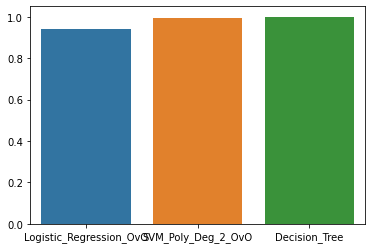

In [16]:
# Model Results Visualization
model_names = ['Logistic_Regression_OvO', 'SVM_Poly_Deg_2_OvO', 'Decision_Tree']
model_train_accuracy = [0.9423722821283366, 0.995845854633003, 1.0]
model_test_accuracy = [0.9422889969067609, 0.9957578435704817, 0.9999116217410517]

sns.barplot(model_names, y=model_train_accuracy)

C:\Users\mando\anaconda3\envs\pythonProject\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

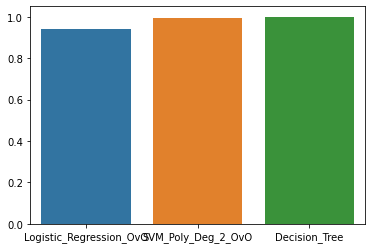

In [17]:
sns.barplot(model_names, y=model_test_accuracy)

<AxesSubplot:>

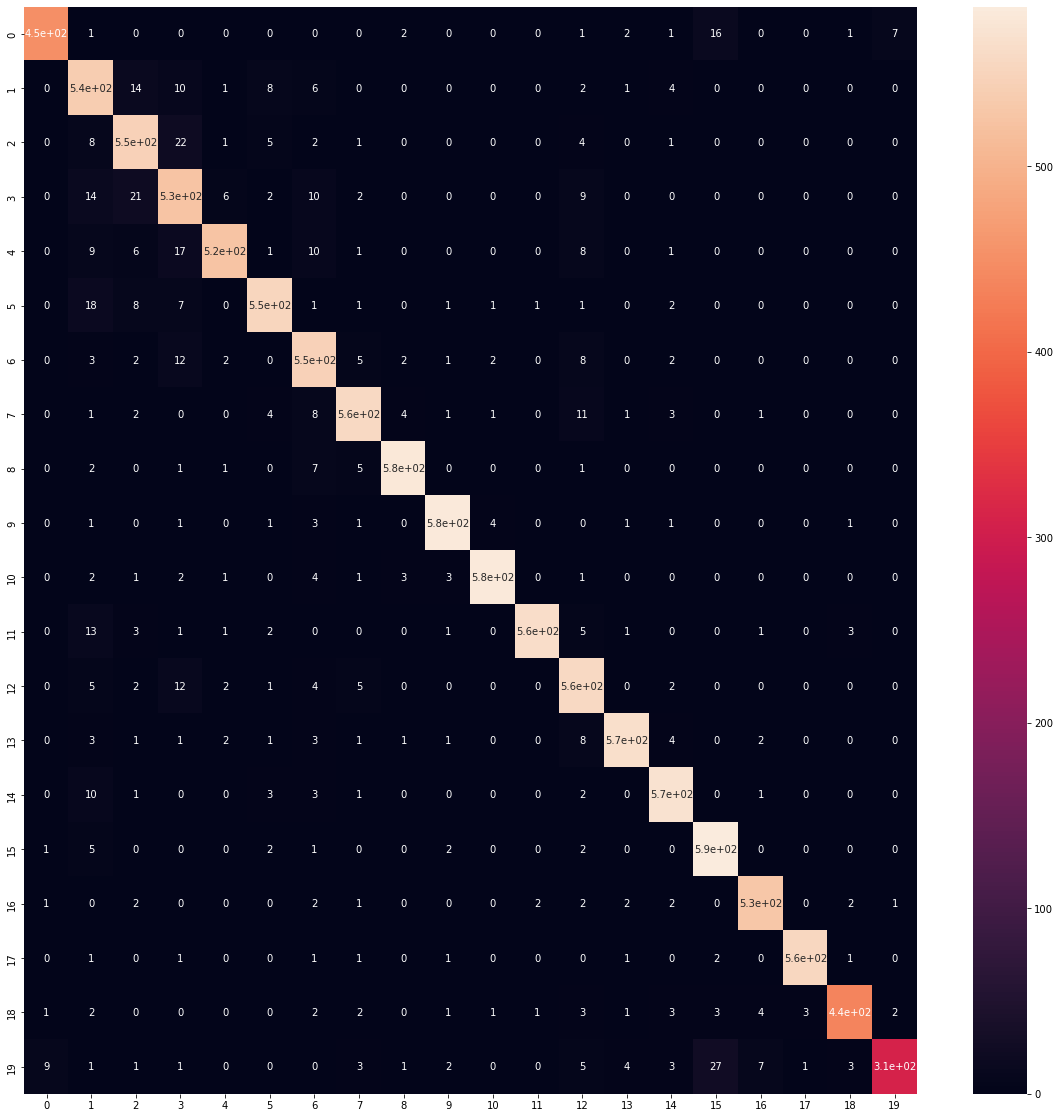

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import plot_confusion_matrix

y_pred_logistic = logistic_ovo.predict(featurestest)
conf_matrix = confusion_matrix(test.type, y_pred_logistic)
plt.figure(figsize=(20,20))
sns.heatmap(conf_matrix, annot=True)

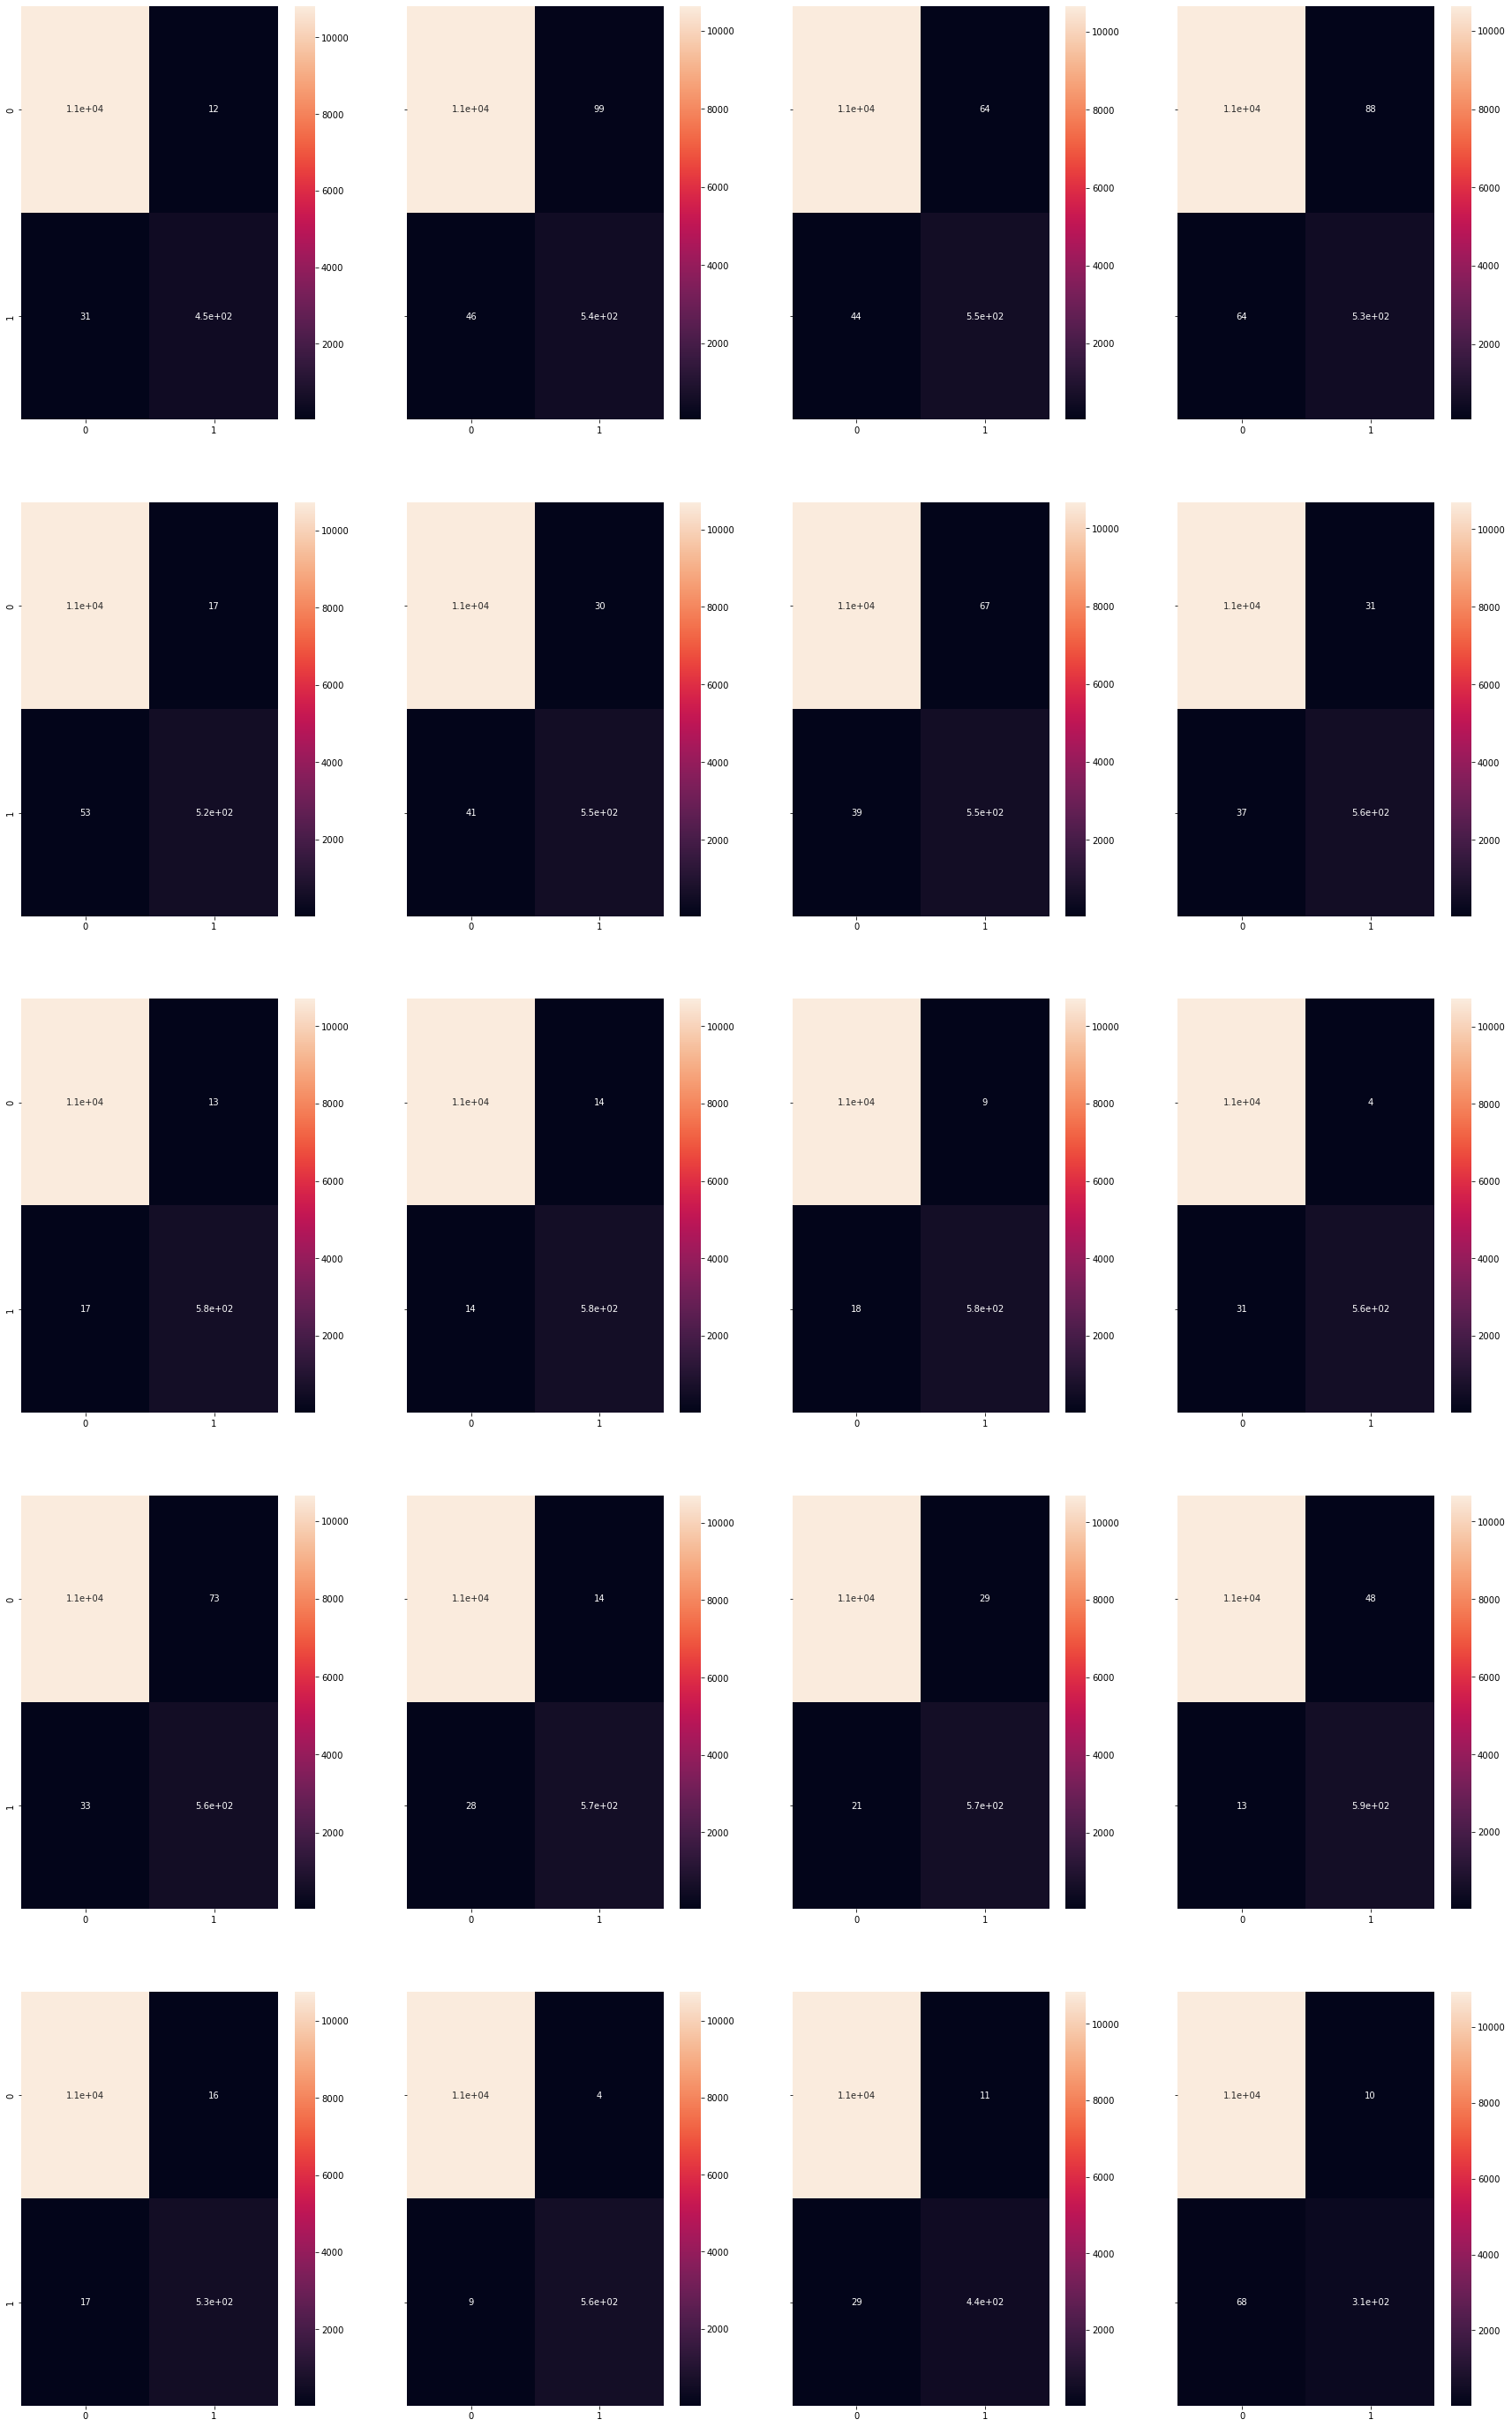

In [32]:
conf_matrices = multilabel_confusion_matrix(test.type, y_pred_logistic)

fig, ax = plt.subplots(nrows=5,ncols=4,sharey=True,)
fig.set_figheight(50)
fig.set_figwidth(30)
count = 0
count1=0
for conf_matrix in conf_matrices:
    sns.heatmap(conf_matrix, annot=True, ax=ax[count][count1])
    if count1==3:
        count = count + 1
        count1=0
    else:
        count1=count1+1

<AxesSubplot:>

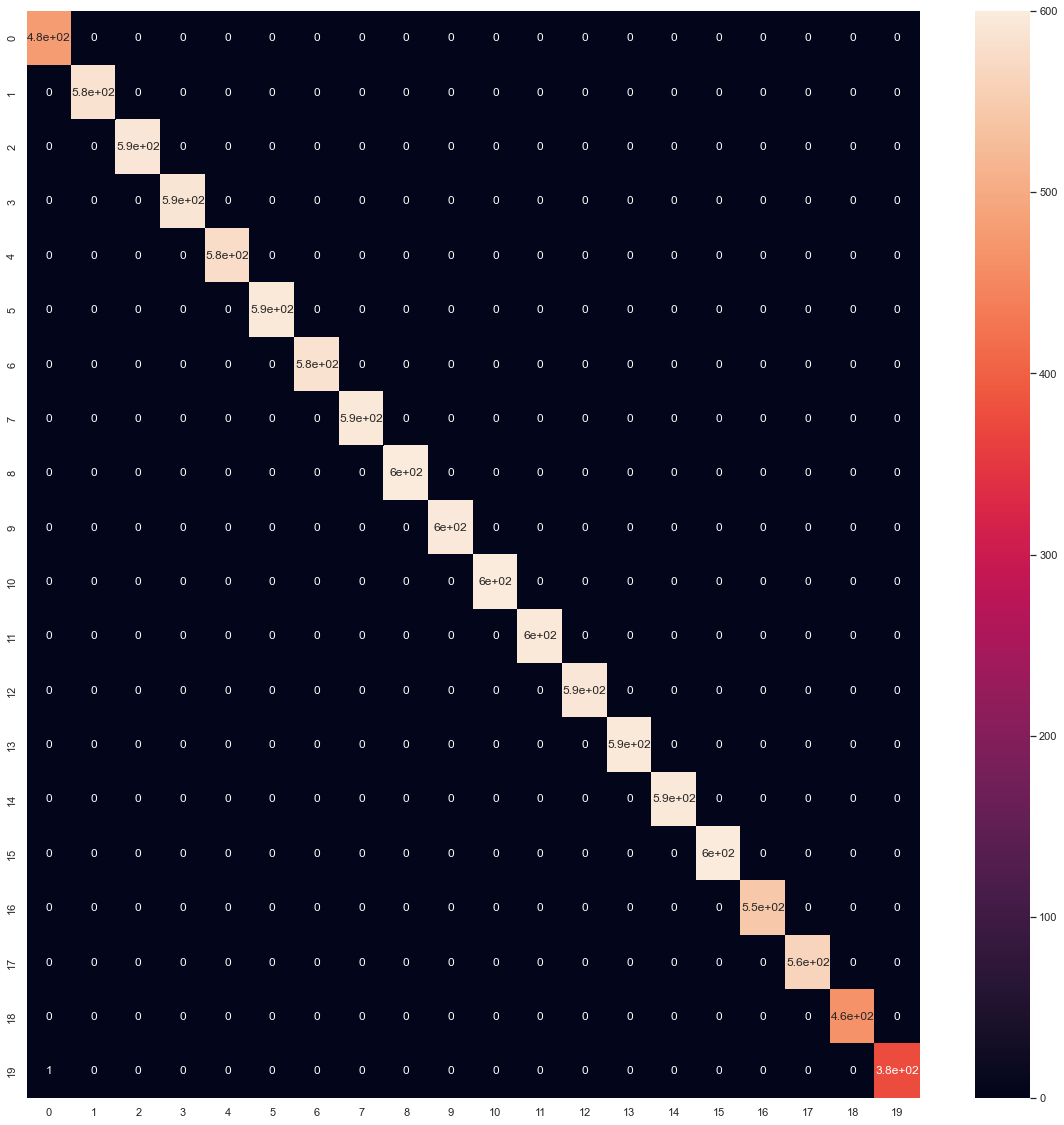

In [39]:

y_pred_tree = tree.predict(featurestest)
conf_matrix = confusion_matrix(test.type, y_pred_tree)
plt.figure(figsize=(20,20))
sns.heatmap(conf_matrix, annot=True)

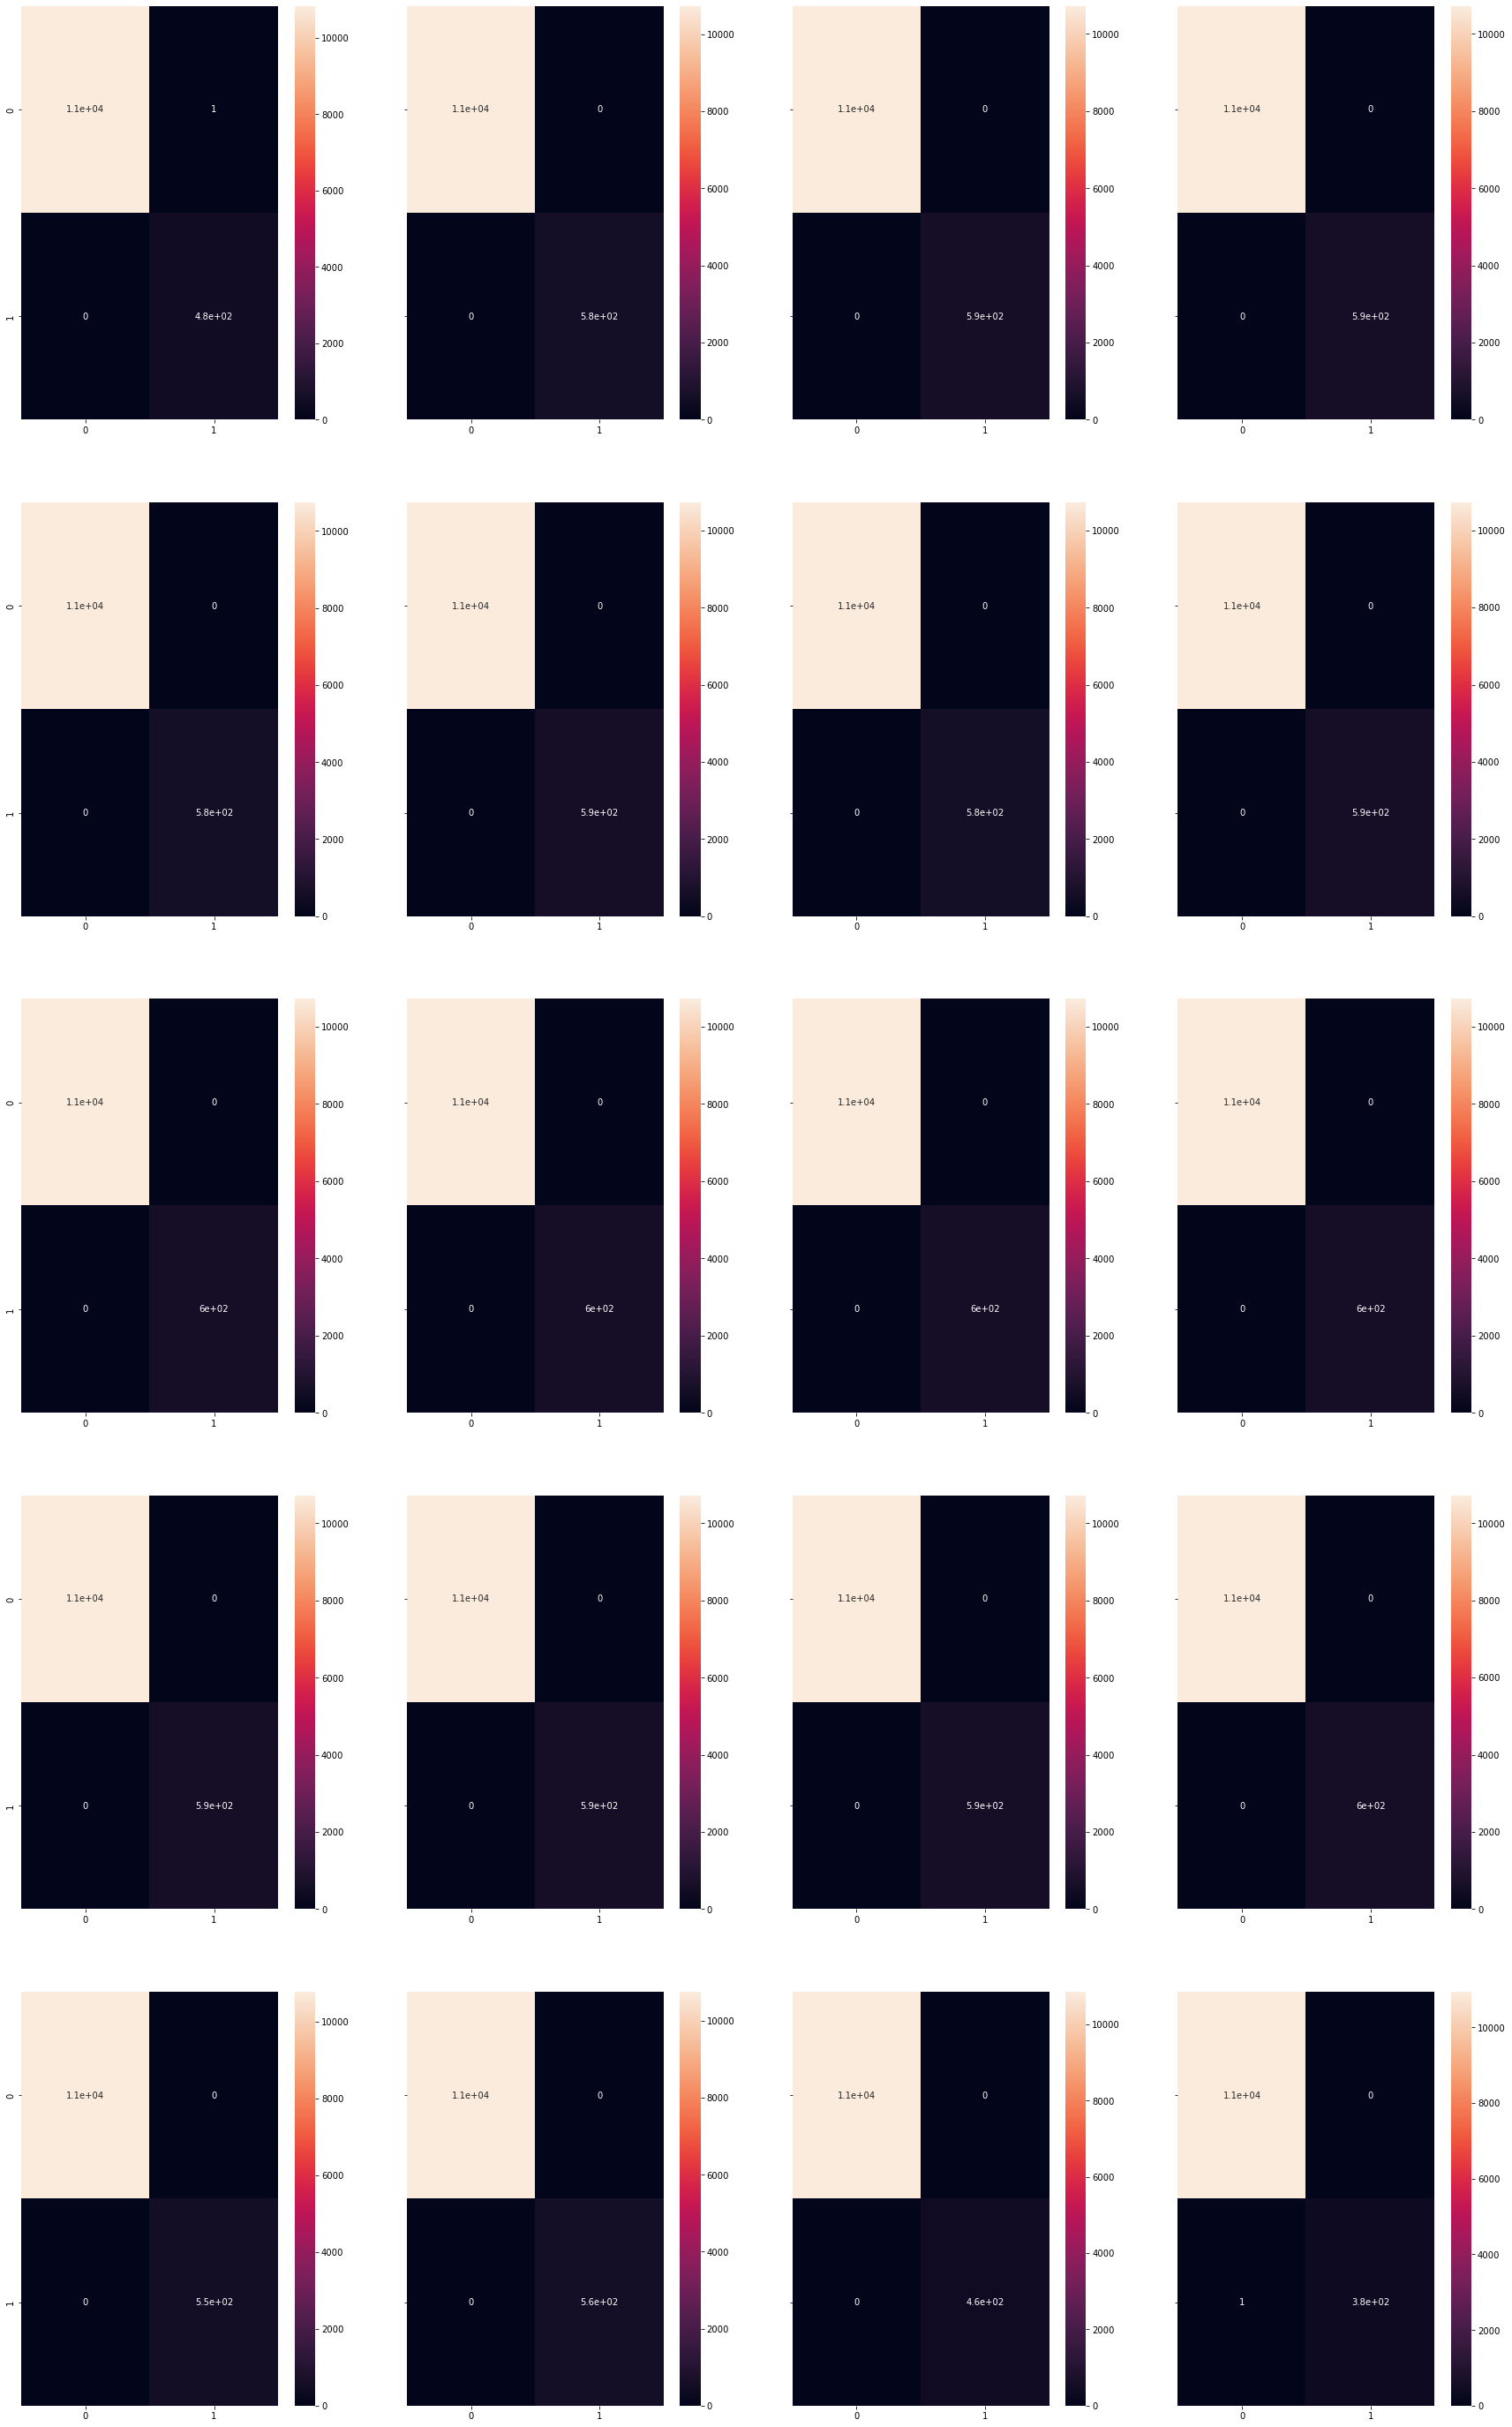

In [33]:
conf_matrices = multilabel_confusion_matrix(test.type, y_pred_tree)

fig, ax = plt.subplots(nrows=5,ncols=4,sharey=True,)
fig.set_figheight(50)
fig.set_figwidth(30)
count = 0
count1=0
for conf_matrix in conf_matrices:
    sns.heatmap(conf_matrix, annot=True, ax=ax[count][count1])
    if count1==3:
        count = count + 1
        count1=0
    else:
        count1=count1+1

<AxesSubplot:>

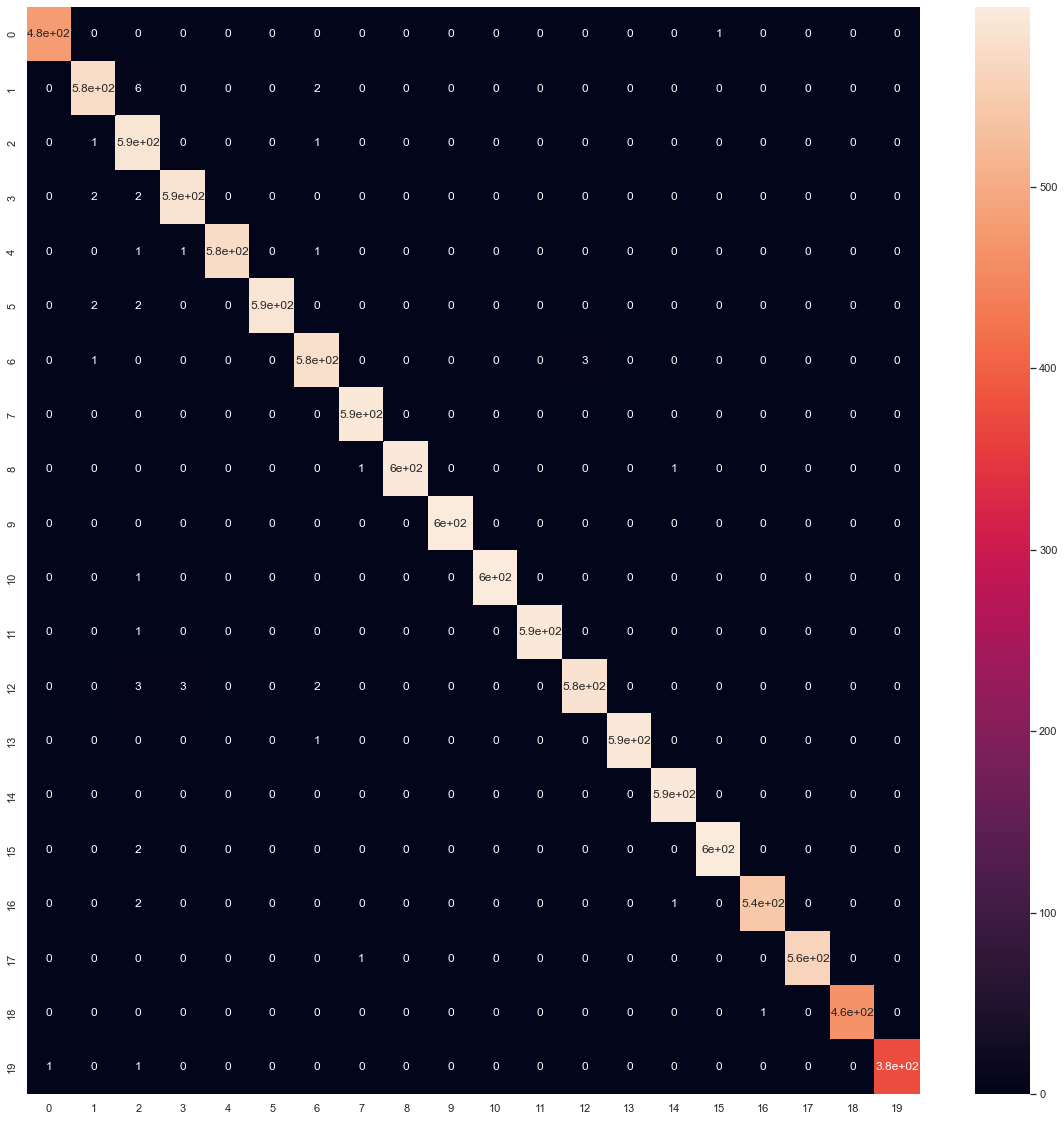

In [40]:
y_pred_svm = svm_kernel_ovr.predict(featurestest)
conf_matrix = confusion_matrix(test.type, y_pred_svm)
plt.figure(figsize=(20,20))
sns.heatmap(conf_matrix, annot=True)

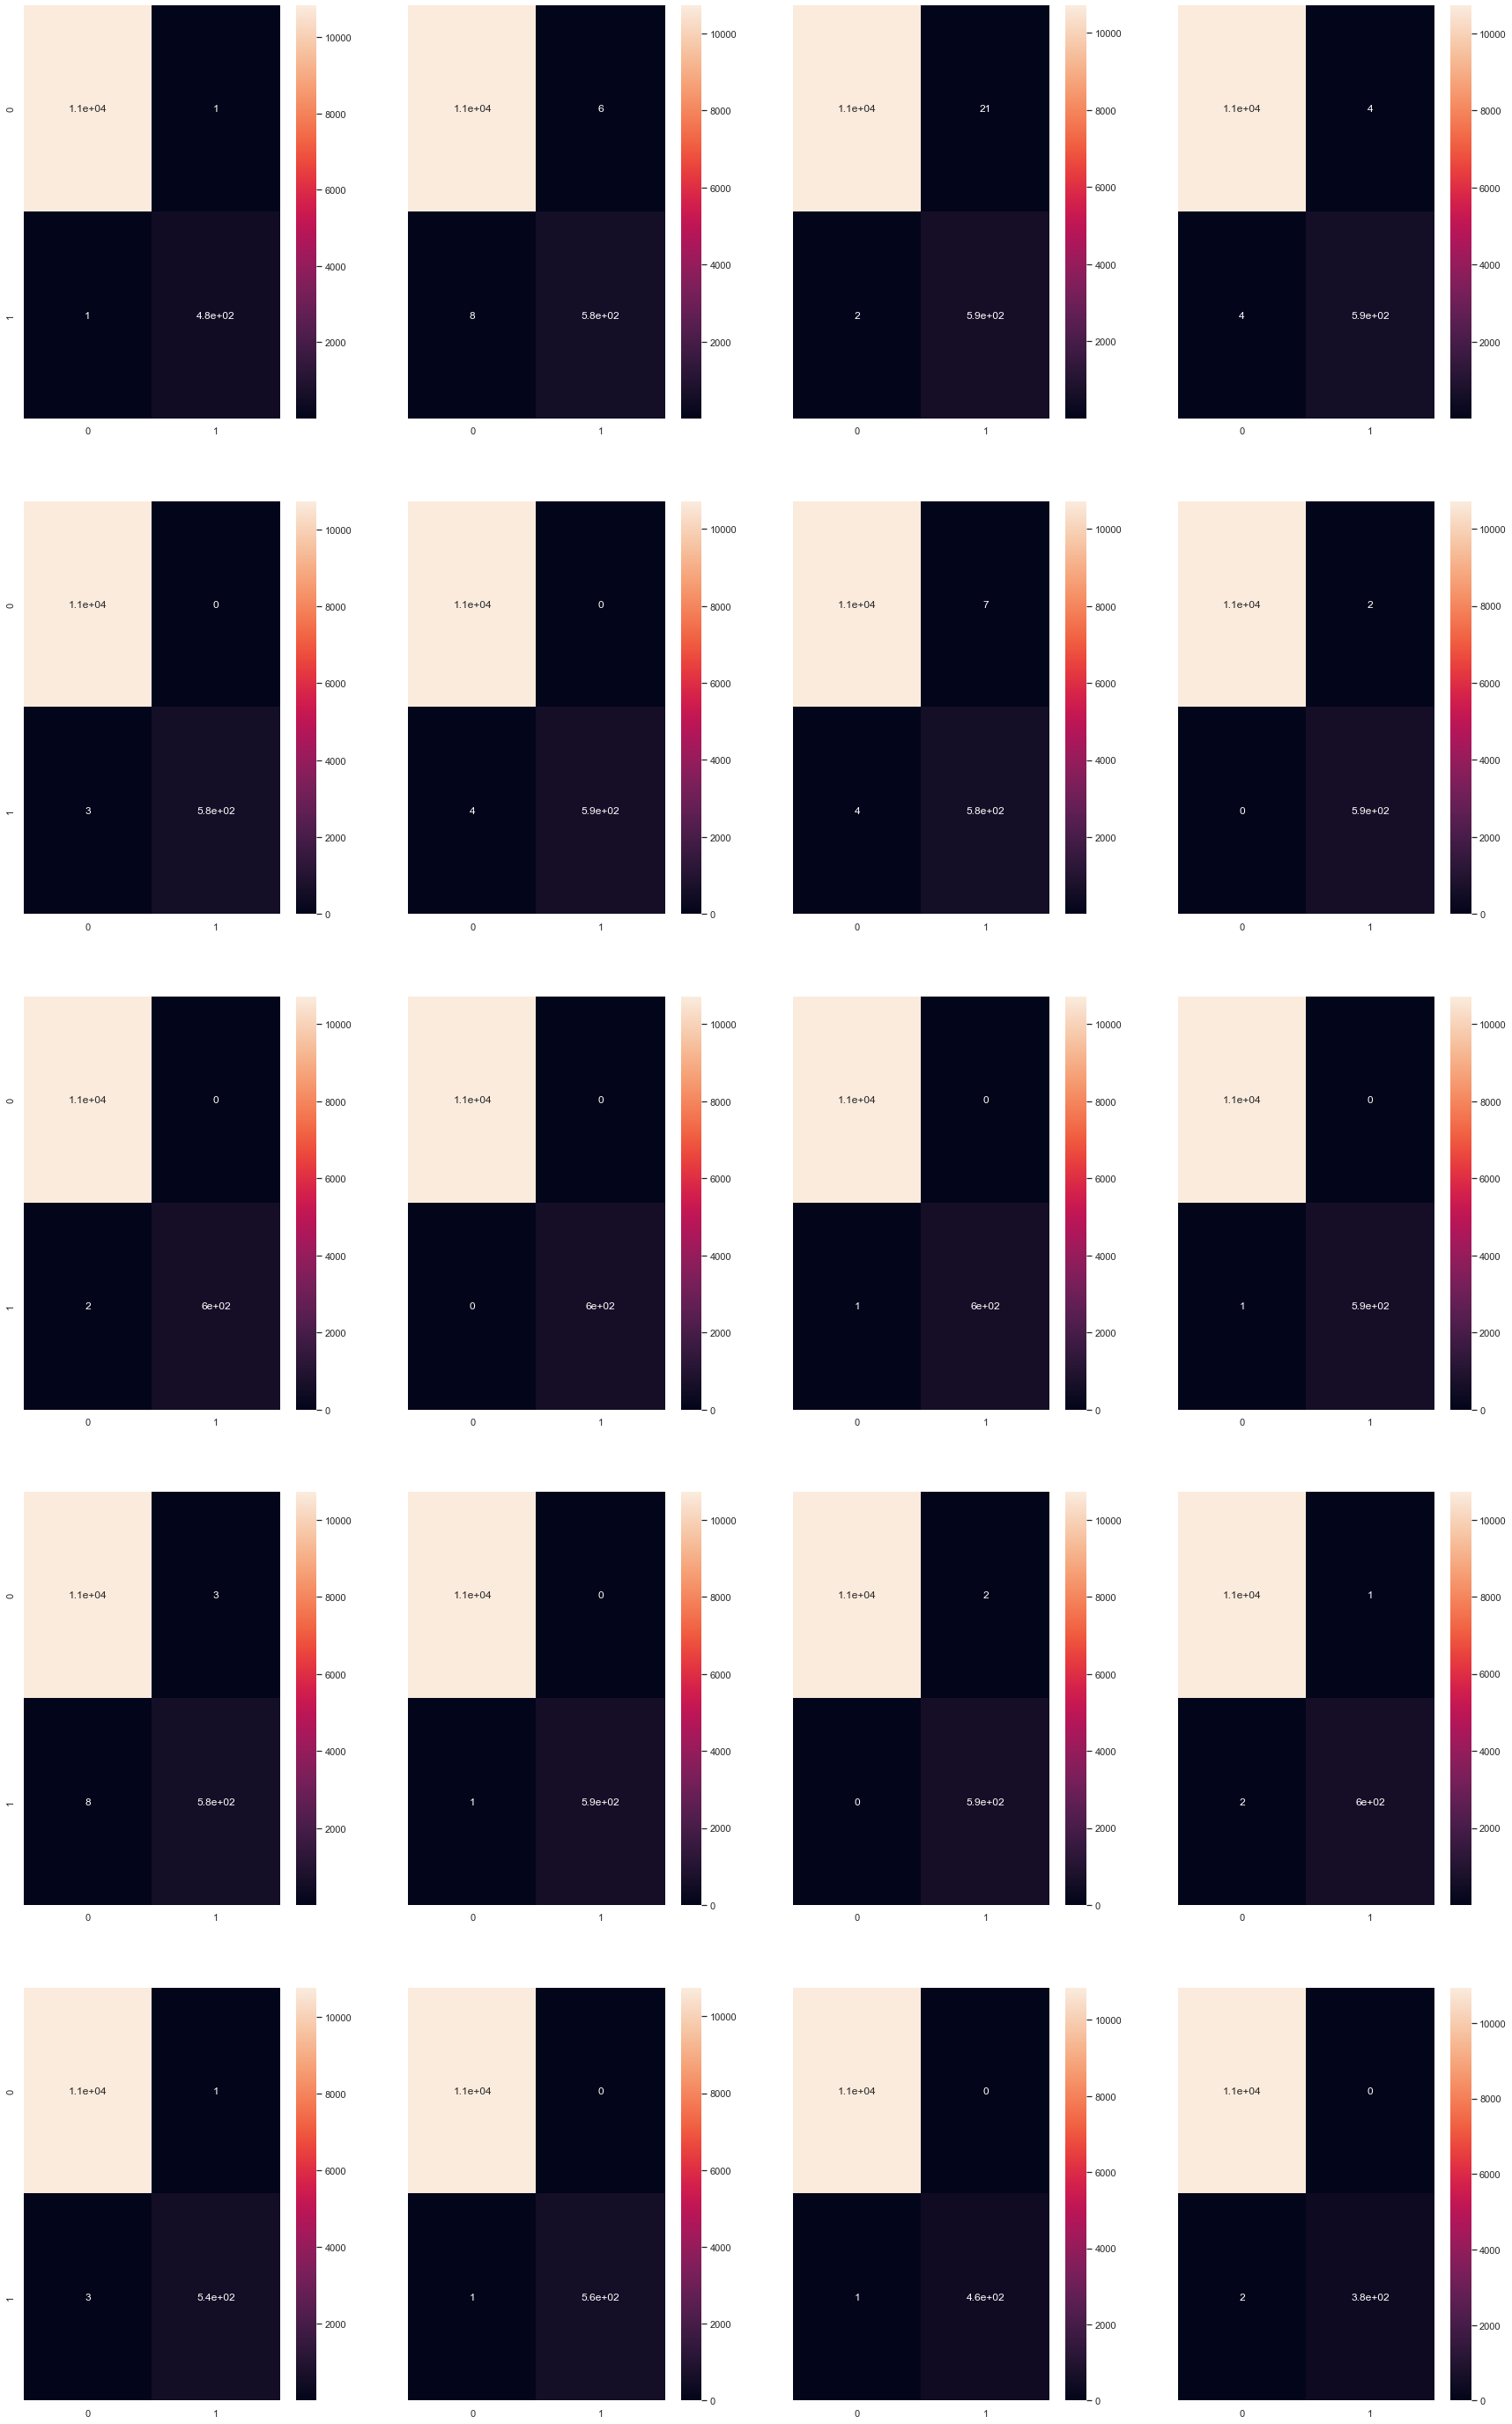

In [41]:
conf_matrices = multilabel_confusion_matrix(test.type, y_pred_svm)

fig, ax = plt.subplots(nrows=5,ncols=4,sharey=True,)
fig.set_figheight(50)
fig.set_figwidth(30)
count = 0
count1=0
for conf_matrix in conf_matrices:
    sns.heatmap(conf_matrix, annot=True, ax=ax[count][count1])
    if count1==3:
        count = count + 1
        count1=0
    else:
        count1=count1+1